# Parcial: Construcción e implementación de , Random Forest 

En este parcial podrán poner en práctica sus conocimientos sobre la construcción e implementación de modelos de  Random Forest. El taller está constituido por 8 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción precio de automóviles

En este parcial se usará el conjunto de datos de Car Listings de Kaggle donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

In [195]:
import warnings
warnings.filterwarnings('ignore')

In [196]:
#librerias
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [197]:
# Importación de librerías
%matplotlib inline
import pandas as pd

# Lectura de la información de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')

# Preprocesamiento de datos para el taller
data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data = data.drop(['Model'], axis=1)

# Visualización dataset
data.head()

,Price,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE
7,21995,2014,6480,False,False,False,True,False,False,False
11,13995,2014,39972,False,False,False,False,True,False,False
167,17941,2016,18989,False,False,False,False,False,True,False
225,12493,2014,51330,False,False,False,True,False,False,False
270,7994,2007,116065,False,True,False,False,False,False,False


In [198]:
# Separación de variables predictoras (X) y variable de interés (y)
#data = data[data['Price'] <= 21000]

data = data[(data['Price'] <= 21000) & ~((data['Price'] >= 9000) & (data['Price'] <= 10000))]
data = data[data['Year'] >= 2001]

y = data['Price']
X = data.drop(['Price'], axis=1)

In [199]:
# Separación de datos en set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 0 - exploracion y analisis de datos 
Los estudiantes deben analizar cuidadosamente los datos del conjunto dataTrain_carListings, identificando posibles valores nulos o inconsistencias. En caso de encontrar datos faltantes, deberán aplicar técnicas de imputación adecuadas para completar la información de manera coherente. Posteriormente, se espera que realicen una exploración visual mediante gráficos que permitan comprender la distribución y las relaciones entre las variables principales.

<class 'pandas.core.frame.DataFrame'>
Index: 9722 entries, 11 to 399976
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Price        9722 non-null   int64
 1   Year         9722 non-null   int64
 2   Mileage      9722 non-null   int64
 3   M_Camry      9722 non-null   bool 
 4   M_Camry4dr   9722 non-null   bool 
 5   M_CamryBase  9722 non-null   bool 
 6   M_CamryL     9722 non-null   bool 
 7   M_CamryLE    9722 non-null   bool 
 8   M_CamrySE    9722 non-null   bool 
 9   M_CamryXLE   9722 non-null   bool 
dtypes: bool(7), int64(3)
memory usage: 370.3 KB

Estadísticas descriptivas:


,Price,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE
count,9722.000000,9722.000000,9722.000000,9722,9722,9722,9722,9722,9722,9722
unique,NaN,NaN,NaN,2,2,2,2,2,2,2
top,NaN,NaN,NaN,False,False,False,False,False,False,False
freq,NaN,NaN,NaN,9194,8311,9616,9230,7348,5890,8743
mean,14493.570459,2013.635466,51787.965542,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3602.966655,3.032419,36137.839903,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,5002.000000,2001.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,12792.750000,2012.000000,26905.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,15204.500000,2014.000000,41251.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,16994.000000,2016.000000,67648.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Valores nulos por columna:


Series([], dtype: int64)

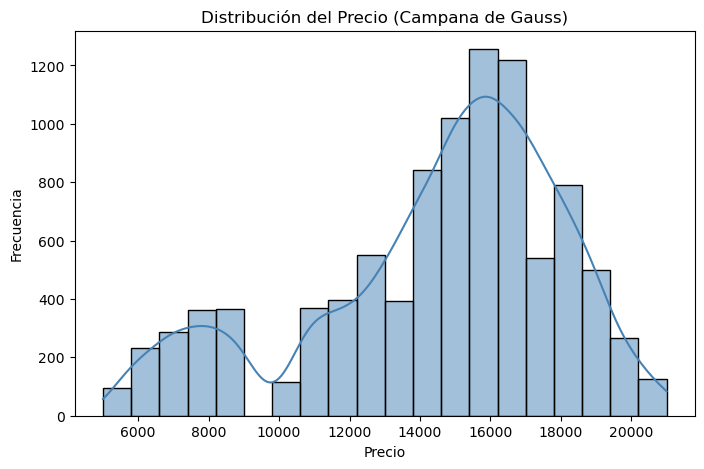

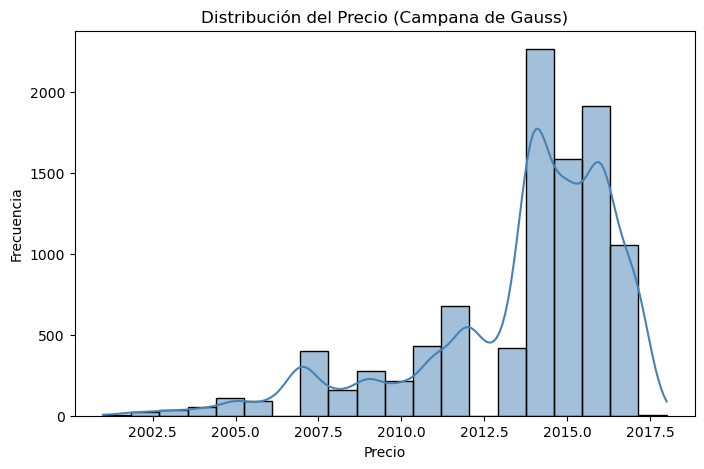

In [200]:
# celda 0 - exploracion y analisis de datos
data.info()

print("\nEstadísticas descriptivas:")
display(data.describe(include='all'))

#Valores nulos
print("\nValores nulos por columna:")
missing = data.isnull().sum()
display(missing[missing > 0])

#Convertir bool a enteros
bool_cols = data.select_dtypes(include=['bool']).columns
data[bool_cols] = data[bool_cols].astype(int)

import matplotlib.pyplot as plt
import seaborn as sns

# Graficar distribución del precio
plt.figure(figsize=(8,5))
sns.histplot(data['Price'], kde=True, color='steelblue', bins=20)
plt.title("Distribución del Precio (Campana de Gauss)")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

# Graficar distribución del annion
plt.figure(figsize=(8,5))
sns.histplot(data['Year'], kde=True, color='steelblue', bins=20)
plt.title("Distribución del Precio (Campana de Gauss)")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

### Punto 1 - Random forest con librería

En la celda 1, usando la librería sklearn entrenen un modelo de Randon Forest para regresion  y comenten sobre el desempeño del modelo.

In [201]:
# Celda 1
model = RandomForestRegressor( n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"R2 Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")



R2 Score: 0.8270
MAE: 1169.14
RMSE: 1526.94


### Punto 2 - Calibración de parámetros Random forest

En la celda 2, calibren los parámetros max_depth, max_features y n_estimators del modelo de Randon Forest para regresion, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

Fitting 3 folds for each of 110 candidates, totalling 330 fits
R² Score: 0.8657
MAE: 1029.51
RMSE: 1345.09


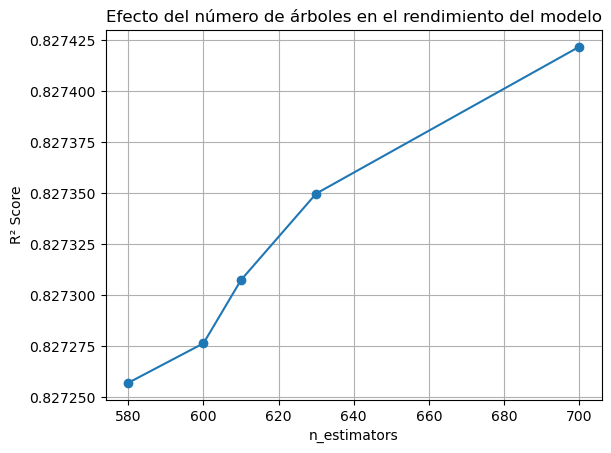

In [206]:
# Celda 2
model = RandomForestRegressor(random_state=42)

# Lista de estimadores que quieres probar
estimator_range = [580, 600, 610, 630, 700]
feature_options = ['sqrt', 'log2']
max_depth = [5, 6, 7, 8, 9, 10, 11, 12, 15, 20, None]
# Definición del grid de hiperparámetros
param_grid = {
    'n_estimators': estimator_range,   # Número de árboles en el bosque
    'max_depth': max_depth,    # Profundidad máxima de los árboles
    'max_features': feature_options  # Número de características por división
}

# Búsqueda con validación cruzada
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring='r2',
    verbose=2
)

grid_search.fit(X_train, y_train)

# Evaluación final
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")



r2_scores = []

# Entrenamos un modelo para cada cantidad de árboles
for n in estimator_range:
    model = RandomForestRegressor(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))

# 📊 Graficar los resultados
plt.plot(estimator_range, r2_scores, marker='o')
plt.xlabel('n_estimators')
plt.ylabel('R² Score')
plt.title('Efecto del número de árboles en el rendimiento del modelo')
plt.grid(True)
plt.show()

In [208]:
#Encontrar los mejores hiperparametros: 

print(grid_search.best_params_)


{'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 630}


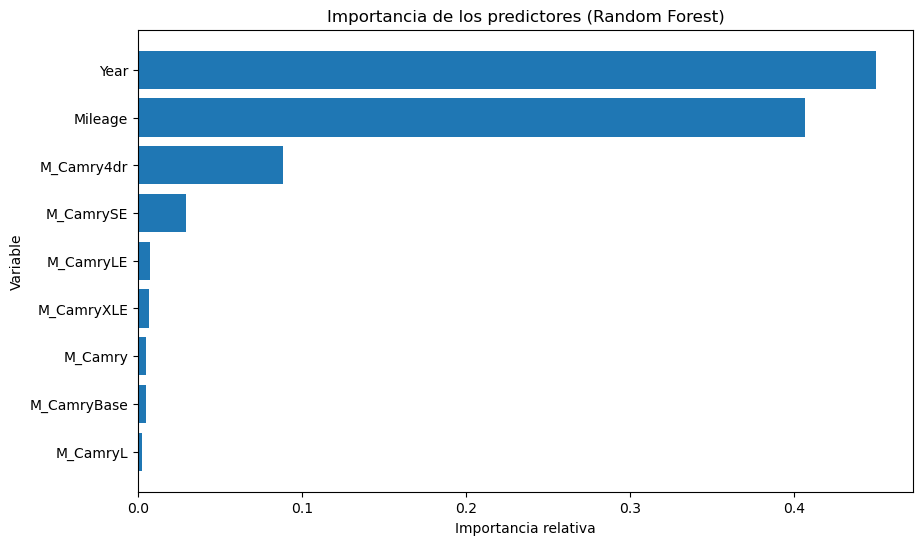

In [204]:
#Importancia de los predictores

importances = best_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)


plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Variable'], feature_importance_df['Importancia'])
plt.gca().invert_yaxis() 
plt.title("Importancia de los predictores (Random Forest)")
plt.xlabel("Importancia relativa")
plt.ylabel("Variable")
plt.show()


### Punto 3 - análisis de resultados, gracias y conclusiones
En la celda 3

In [205]:
#celda 3

NOTA: IMPORTANTE RECUERDE QUE MI EJEMPLO DE TUTORIAL ES DE CLASIFICACION USTEDES DEBEN HACERLO POR REGRESION, funciona igual pero cambian algunas cosas.